## <font color=red> Reading data and creating required columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('ENB2012_data.csv')

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
data.columns= ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", 
               "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]

In [5]:
data.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [6]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
data.shape

(768, 10)

In [8]:
pd.isnull(data).sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

## Adding column for overall load

In [9]:
data['Overall Load'] = data['Heating Load'] + data['Cooling Load']
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12


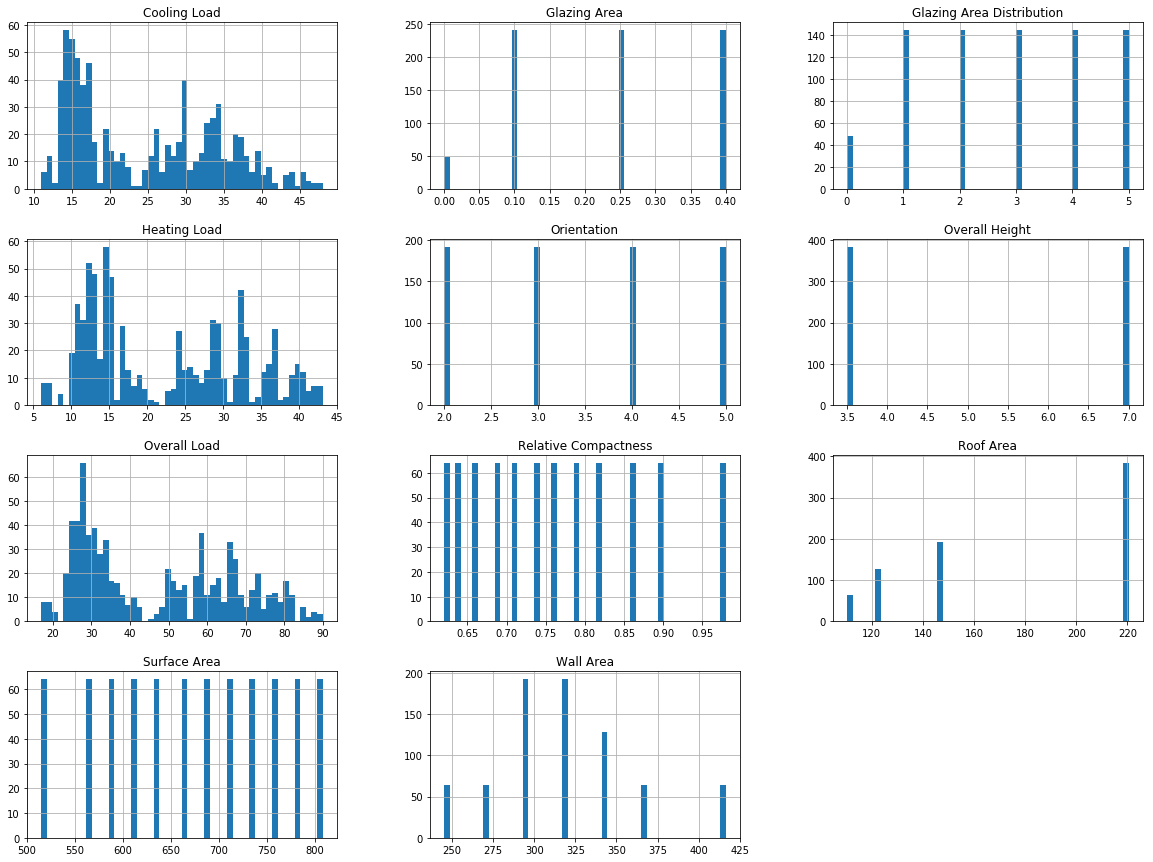

In [10]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
data.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339,0.631950
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999,-0.669389
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117,0.444502
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547,-0.867423
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889431,0.895785,0.897945
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290,0.005637
Glazing Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269841,0.207505,0.241048
Glazing Area Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525,0.069911
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-0.002587,2.698410e-01,8.736759e-02,1.000000,0.975862,0.994299
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000,0.993585


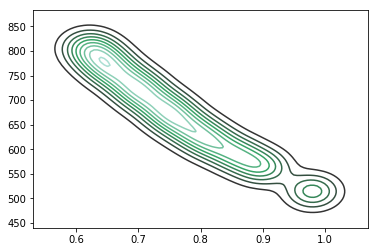

In [12]:
sns.kdeplot(data)

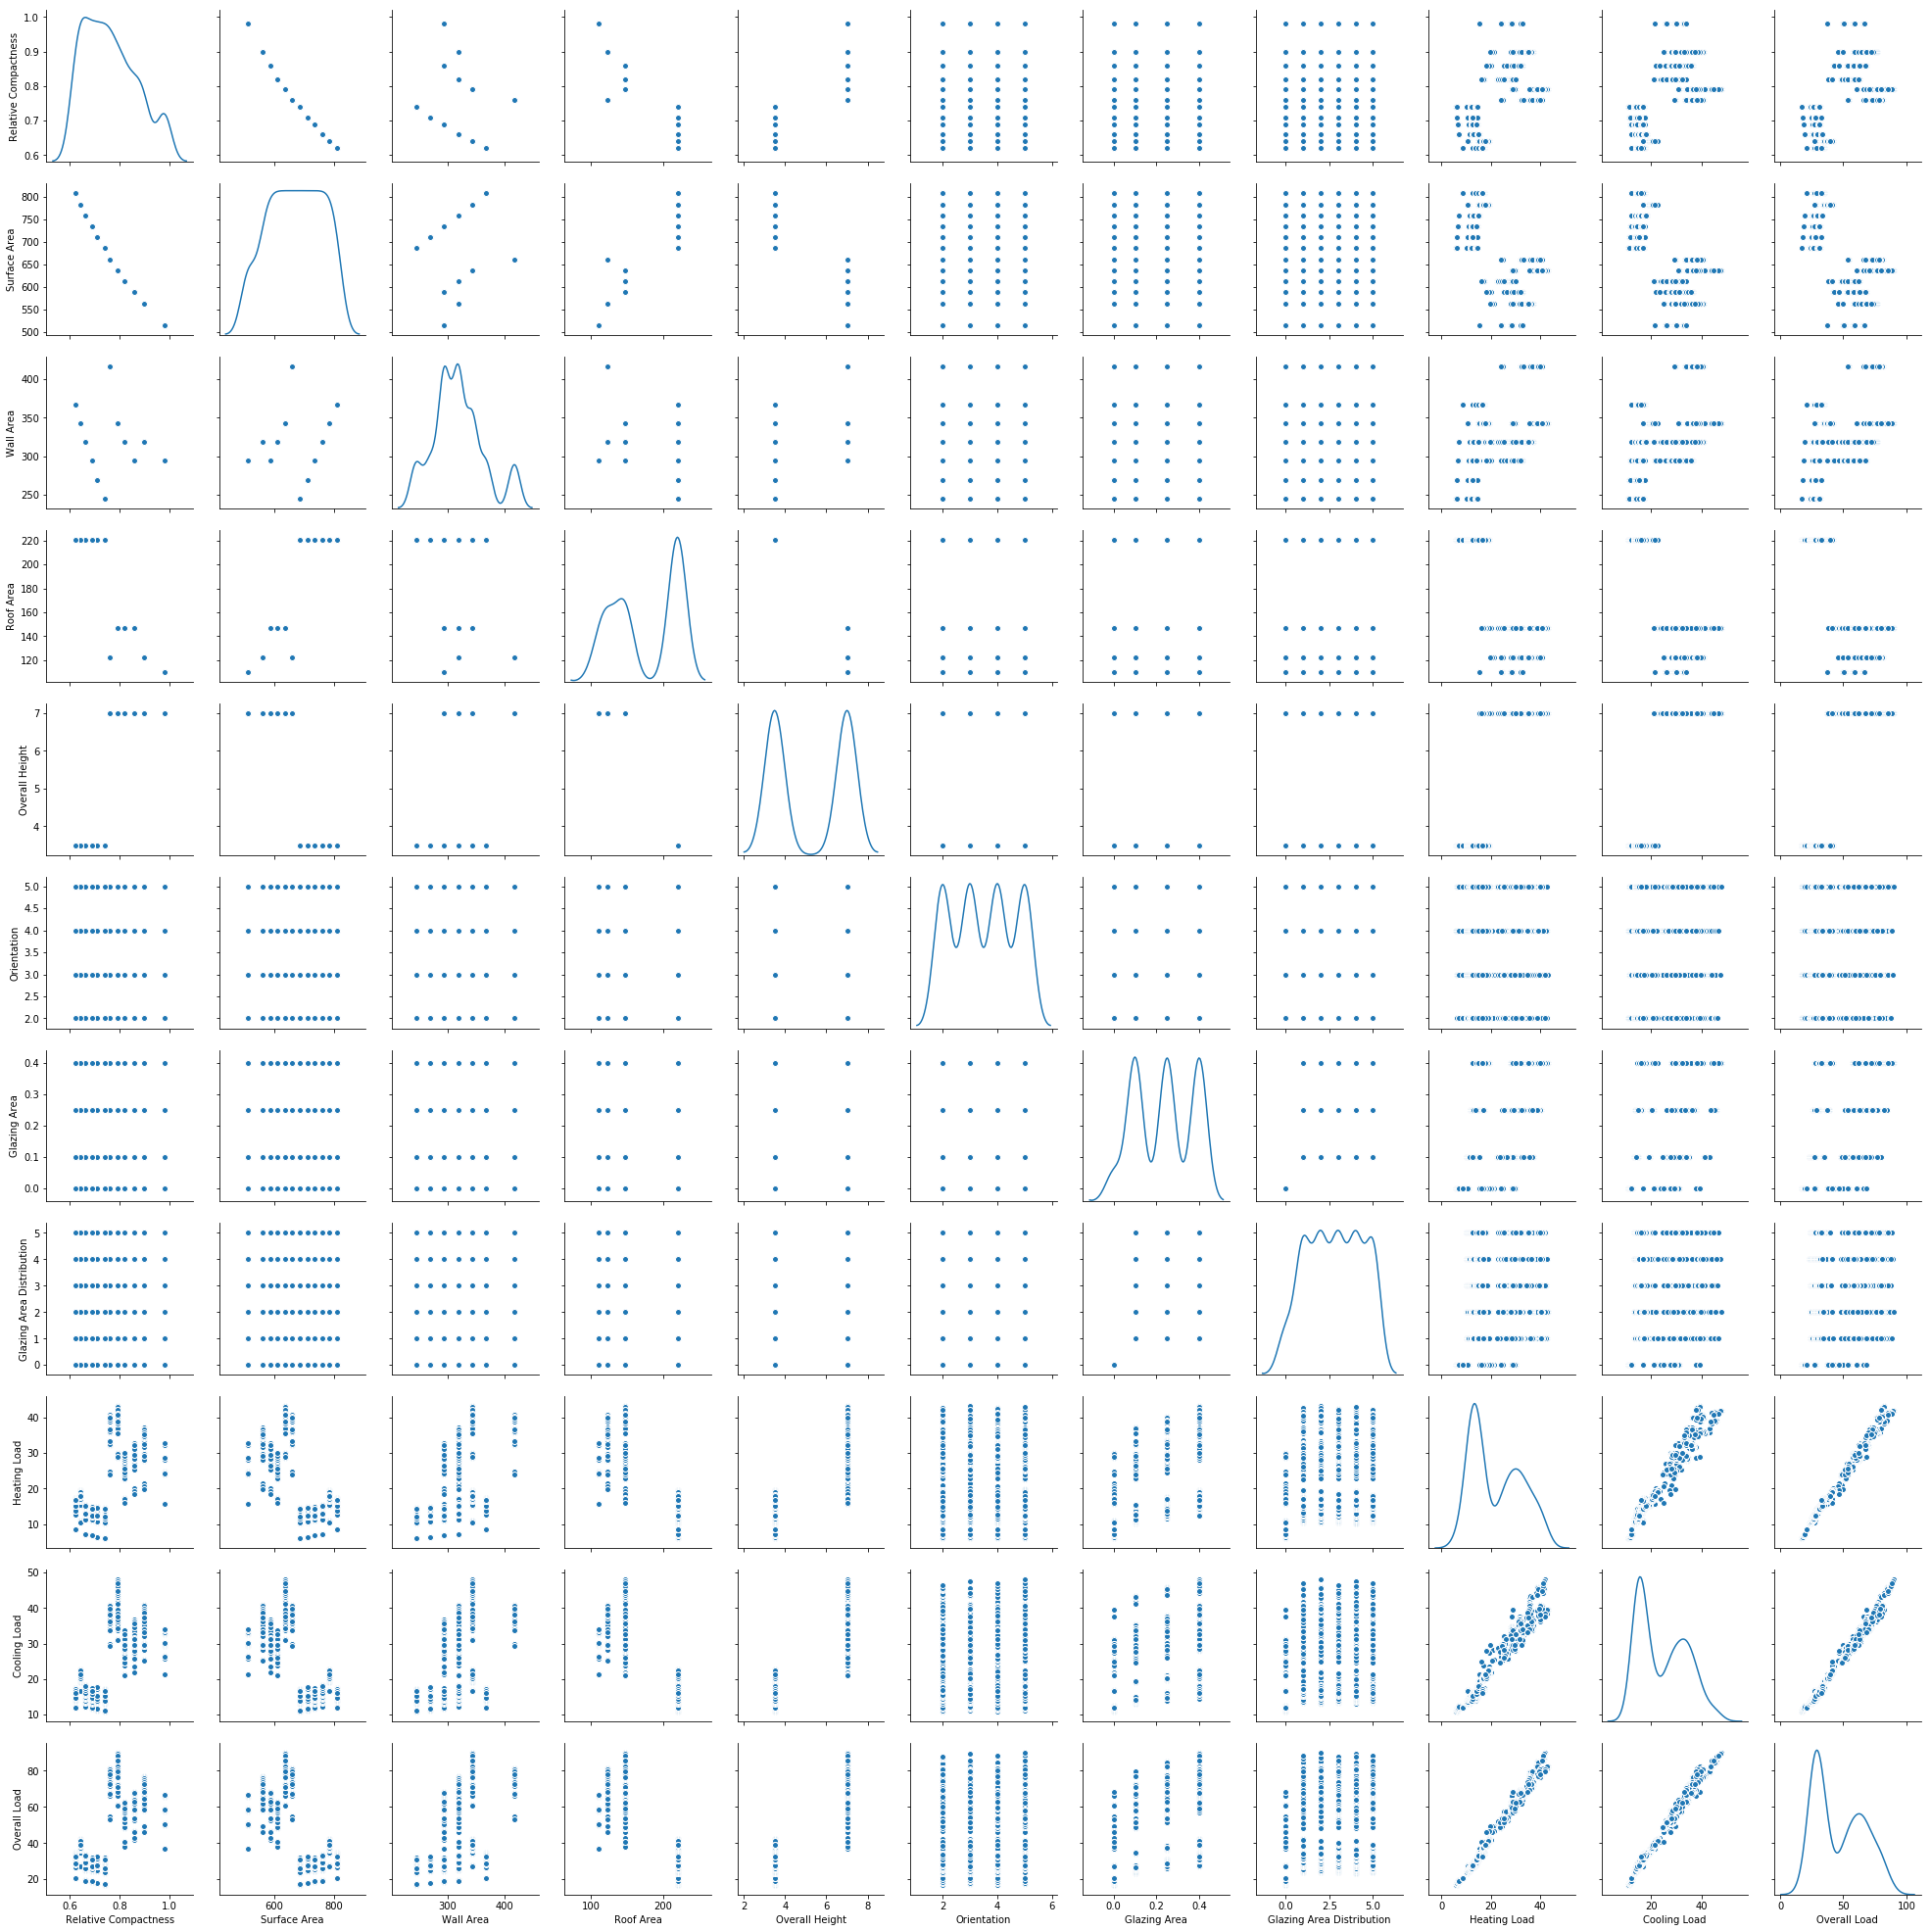

In [13]:
sns.pairplot(data, kind="scatter", diag_kind='kde')

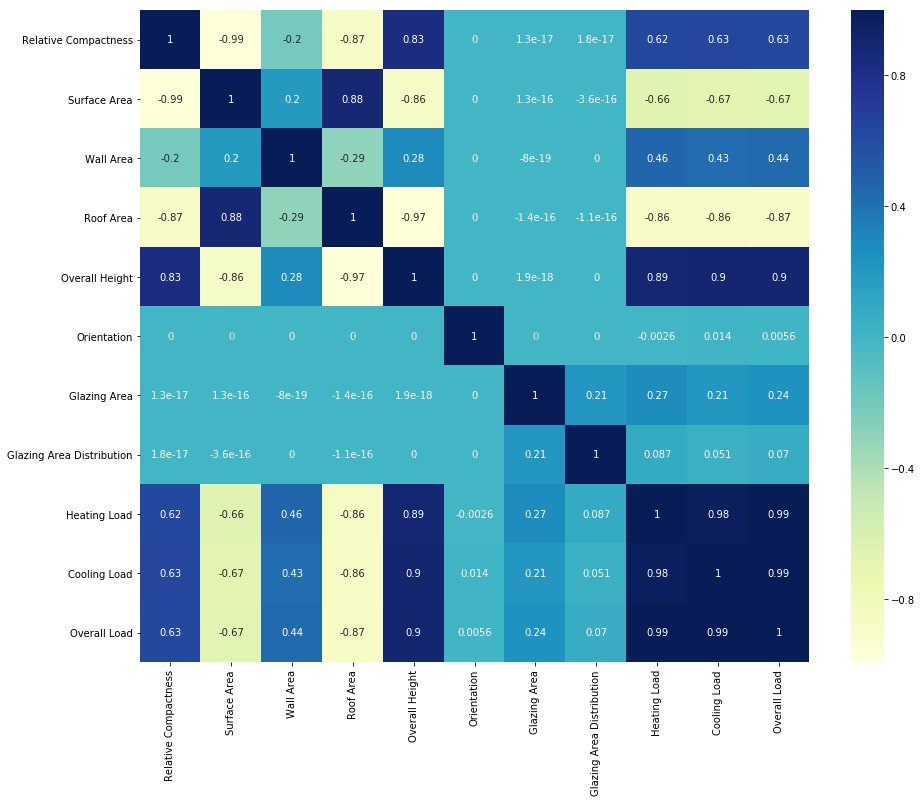

In [14]:
plt.subplots(figsize=(15,12))
corr = data.corr()
sns.heatmap(corr, annot=True,cmap="YlGnBu")

## Trend of overall load

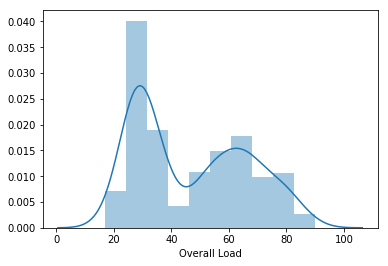

In [15]:
sns.distplot(data['Overall Load'])

{'boxes': [<matplotlib.lines.Line2D at 0x265c8156978>],
 'caps': [<matplotlib.lines.Line2D at 0x265c815f4e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x265c8164240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x265c815fda0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x265c8156ba8>,
  <matplotlib.lines.Line2D at 0x265c815f080>]}

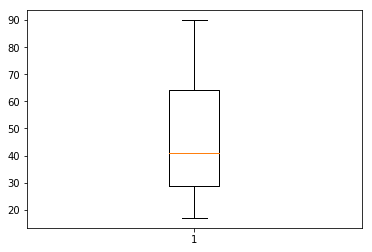

In [16]:
plt.boxplot(data['Overall Load'])

In [17]:
data['Overall Load'].quantile([.25, .50, 0.75])

0.25    28.750
0.50    40.970
0.75    64.335
Name: Overall Load, dtype: float64

## Adding column for classes for efficiency

In [18]:
data['Efficiency'] = np.where(data['Overall Load']<29, 'Low', np.where(data['Overall Load']<64, 'Average', 'High'))
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load,Efficiency
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,Average
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,Average
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,Average
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,Average
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,Average


In [19]:
data.shape

(768, 12)

In [20]:
data['Efficiency'].value_counts()

Average    368
Low        207
High       193
Name: Efficiency, dtype: int64

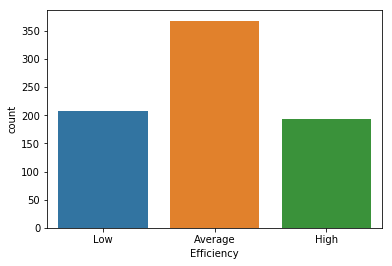

In [21]:
sns.countplot(x='Efficiency', data=data, order=['Low','Average','High'])

## <font color=red> Creating different datasets for different Y variables

## Data set for heating load

In [22]:
data_heat = data.drop(columns=['Cooling Load','Overall Load','Efficiency'])

In [23]:
data_heat.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [24]:
data_heat.shape

(768, 9)

## Data set for cooling load

In [25]:
data_cool = data.drop(columns=['Heating Load','Overall Load','Efficiency'])
data_cool.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [26]:
data_cool.shape

(768, 9)

## Data set for efficiency classification

In [27]:
data_eff = data.drop(columns=['Cooling Load','Heating Load','Overall Load'])
data_eff.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Efficiency
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,Average
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,Average
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,Average
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,Average
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,Average


## <font color=red> Models for predicting heating load

## Data preprocessing

In [28]:
X = data_heat.drop(columns=['Heating Load'])
y= data_heat['Heating Load']

In [29]:
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating Load, dtype: float64

In [30]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Neural Network Regressor

### Grid Search to find the Best Parameters for Nueral Network

In [31]:
# ## Neural Network Regressor with Parameter tuning
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV

# Build the neural network regressor function to be used in the keras-sklearn wrapper
# def build_reg(optimizer):
#    nn_reg = Sequential()
#    nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
#    nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
#    nn_reg.add(Dense(1, activation='linear'))
    
#    nn_reg.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
#    return nn_reg

#    nn_reg = KerasRegressor(build_fn=build_reg)

# param_grid = {'batch_size': [10,16,25],
#          'epochs': [50,75, 100],
#          'optimizer': ['rmsprop','adam']}

# nn_reg_grid_heat = GridSearchCV(estimator=nn_reg, param_grid=param_grid, scoring='r2', cv=8)

# nn_reg_grid_heat.fit(X_train, y_train)

### Best Parameters : - Batch Size= 10 , Epochs= 100, Optimizer= 'rmsprop'

In [32]:
from keras.models import Sequential
from keras.layers import Dense

nn_reg = Sequential()
nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(1, activation='linear'))

nn_reg.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

nn_reg.fit(X_train, y_train, batch_size=10, epochs=100)

Using TensorFlow backend.


Epoch 1/100
576/576 [==============================] - 0s 320us/step - loss: 583.2290 - mean_squared_error: 583.2290
Epoch 2/100
576/576 [==============================] - 0s 101us/step - loss: 569.2464 - mean_squared_error: 569.2464
Epoch 3/100
576/576 [==============================] - 0s 75us/step - loss: 548.4313 - mean_squared_error: 548.4313
Epoch 4/100
576/576 [==============================] - 0s 77us/step - loss: 520.7321 - mean_squared_error: 520.7321
Epoch 5/100
576/576 [==============================] - 0s 80us/step - loss: 486.1497 - mean_squared_error: 486.1497
Epoch 6/100
576/576 [==============================] - 0s 125us/step - loss: 443.9482 - mean_squared_error: 443.9482
Epoch 7/100
576/576 [==============================] - 0s 75us/step - loss: 396.1820 - mean_squared_error: 396.1820
Epoch 8/100
576/576 [==============================] - 0s 75us/step - loss: 343.3350 - mean_squared_error: 343.3350
Epoch 9/100
576/576 [==============================] - 0s 96us/step -

576/576 [==============================] - 0s 110us/step - loss: 9.9271 - mean_squared_error: 9.9271
Epoch 73/100
576/576 [==============================] - 0s 77us/step - loss: 9.8658 - mean_squared_error: 9.8658
Epoch 74/100
576/576 [==============================] - 0s 84us/step - loss: 9.8840 - mean_squared_error: 9.8840
Epoch 75/100
576/576 [==============================] - 0s 101us/step - loss: 9.8931 - mean_squared_error: 9.8931
Epoch 76/100
576/576 [==============================] - 0s 96us/step - loss: 9.8705 - mean_squared_error: 9.8705
Epoch 77/100
576/576 [==============================] - 0s 94us/step - loss: 9.8389 - mean_squared_error: 9.8389
Epoch 78/100
576/576 [==============================] - 0s 108us/step - loss: 9.8638 - mean_squared_error: 9.8638
Epoch 79/100
576/576 [==============================] - 0s 85us/step - loss: 9.8493 - mean_squared_error: 9.8493
Epoch 80/100
576/576 [==============================] - 0s 101us/step - loss: 9.8535 - mean_squared_error:

In [33]:
from sklearn.metrics import r2_score

y_train_predict = nn_reg.predict(X_train)
y_test_predict = nn_reg.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.90
Test r2: 0.90


## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_predict = lr.predict(X_train)
print('Accuracy of Linear Regression on training set: {:.2f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(lr.score(X_test, y_test)))

Accuracy of Linear Regression on training set: 0.92
Accuracy of Linear Regression on test set: 0.91


In [35]:
print("lr.coef_: {}".format(lr.coef_))

print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ -2.57105104e+01   1.16973473e+15  -6.82345261e+14  -8.77301049e+14
   1.36250000e+01  -1.03515625e-01   8.11987305e+00   1.11669922e+00]
lr.intercept_: 194955788777037.97


## KNN Regressor

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [2,4,6,8,10,12]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'n_neighbors': 8}

In [37]:
knn = KNeighborsRegressor(n_neighbors=8).fit(X_train, y_train)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of Knn Regressor on training set: 0.94
Accuracy of Knn Regressor on test set: 0.92


## Ridge

In [38]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [39]:
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print('Accuracy of Ridge Regressor on training set: {:.2f}'
     .format(ridge.score(X_train, y_train)))
print('Accuracy of Ridge Regressor on test set: {:.2f}'
     .format(ridge.score(X_test, y_test)))

Accuracy of Ridge Regressor on training set: 0.92
Accuracy of Ridge Regressor on test set: 0.91


## Lasso

In [40]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 10000).fit(X_train,y_train)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [41]:
lasso = Lasso(max_iter = 10000, alpha=0.01).fit(X_train,y_train)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print('Accuracy of Lasso Regressor on training set: {:.2f}'
     .format(lasso.score(X_train, y_train)))
print('Accuracy of Lasso Regressor on test set: {:.2f}'
     .format(lasso.score(X_test, y_test)))

Number of features used: 7
Accuracy of Lasso Regressor on training set: 0.91
Accuracy of Lasso Regressor on test set: 0.91


In [42]:
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features with non-zero weight (sorted by absolute magnitude):
	Overall Height, 17.137
	Relative Compactness, -8.868
	Glazing Area, 7.841
	Roof Area, -5.615
	Wall Area, 3.758
	Glazing Area Distribution, 1.114
	Orientation, -0.047


## Polynomial Regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print("X Train Polynomial Shape: - {}".format(X_train_poly.shape))
print("X Test Polynomial Shape: - {}".format(X_test_poly.shape))

X Train Polynomial Shape: - (576, 45)
X Test Polynomial Shape: - (192, 45)


In [44]:
lr = LinearRegression().fit(X_train_poly, y_train)
predict_lr= lr.predict(X_test_poly)
print('(poly deg 2) R-squared score (training): {}'
     .format(lr.score(X_train_poly, y_train)))
print('(poly deg 2) R-squared score (test): {}\n'
     .format(lr.score(X_test_poly, y_test)))

(poly deg 2) R-squared score (training): 0.9940845052078645
(poly deg 2) R-squared score (test): 0.9929388165887001



##### Addition of many polynomial features often leads to overfitting, so we often use polynomial features in combination with regression that has a regularization penalty, like ridge regression

## Polynomial with Ridge

In [45]:
ridge = Ridge().fit(X_train_poly, y_train)
print('(poly deg 2 + ridge) R-squared score (training): {}'
     .format(ridge.score(X_train_poly, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {}'
     .format(ridge.score(X_test_poly, y_test)))

(poly deg 2 + ridge) R-squared score (training): 0.9367331731420392
(poly deg 2 + ridge) R-squared score (test): 0.9362546524923423


## Linear SVR

In [46]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(random_state=10).fit(X_train, y_train)
param_grid = {'C': [0.01,0.1,1,10,100]}
lsvr=LinearSVR()
grid_search = GridSearchCV(lsvr,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10}

In [47]:
lsvr=LinearSVR(C=10).fit(X_train, y_train)
print('Accuracy of Linear SVR classifier on training set: {:.2f}'
     .format(lsvr.score(X_train, y_train)))
print('Accuracy of Linear SVR classifier on test set: {:.2f}'
     .format(lsvr.score(X_test, y_test)))

Accuracy of Linear SVR classifier on training set: 0.91
Accuracy of Linear SVR classifier on test set: 0.91


## SVM Regressor

In [48]:
from sklearn.svm import SVR
param_grid = {'C': [0.01,0.1,1,10,100], 'epsilon': [0.01,0.1,1,10,100]}
svr = SVR()
grid_search = GridSearchCV(svr,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 100, 'epsilon': 1}

In [49]:
svr = SVR(C=100, epsilon=1).fit(X_train, y_train)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(svr.score(X_train, y_train)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(svr.score(X_test, y_test)))

Accuracy of Knn Regressor on training set: 0.94
Accuracy of Knn Regressor on test set: 0.94


## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 4, 6 ,8, 10]}
grid_search = GridSearchCV(dt, param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 8}

In [51]:
dt = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)
print('Accuracy of DT Regressor on training set: {}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Dt Regressor on test set: {}'
     .format(dt.score(X_test, y_test)))

Accuracy of DT Regressor on training set: 0.9992710026423552
Accuracy of Dt Regressor on test set: 0.996601910578816


## <font color='Red'> Summary of R- Square Scores for Base Regression Models for Heating Load

1. Linear Regression : - 0.91
2. KNN Regressor : - 0.92
3. Ridge: - 0.91
4. Lasso : - 0.91
5. Polynomial : - 0.9929
6. Polynomial with Ridge: - 0.9362
7. Linear SVR : - 0.92
8. SVM : - 0.94
9. Decision Tree : - 0.9966

### Best Base Regression Model :- Decision Tree with R Square= 0.9966

# <font color='green'>Ensembles

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {'max_features': [2,4,6,8],
            'max_depth': [2,4,6,8],
           'max_leaf_nodes':[2,4,6,8]}
rf = RandomForestRegressor(random_state=10)
grid_search = GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 4, 'max_features': 6, 'max_leaf_nodes': 8}

In [53]:
rf = RandomForestRegressor(max_depth= 4, max_features=6, max_leaf_nodes=8, random_state=10).fit(X_train, y_train)
print('Accuracy of RF Regressor on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Rf Regressor on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of RF Regressor on training set: 0.97
Accuracy of Rf Regressor on test set: 0.95


## Bagging and Pasting

### <font color='blue'>Bagging with KNN

In [54]:
from sklearn.ensemble import BaggingRegressor
bag_knn = BaggingRegressor(base_estimator=knn,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging KNN Regressor on training set: {:.2f}'
     .format(bag_knn.score(X_train, y_train)))
print('Accuracy of Bagging KNN on test set: {:.2f}'
     .format(bag_knn.score(X_test, y_test)))

Accuracy of Bagging KNN Regressor on training set: 0.86
Accuracy of Bagging KNN on test set: 0.85


###  <font color='blue'>Pasting with KNN

In [55]:
paste_knn = BaggingRegressor(base_estimator=knn, max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting KNN Regressor on training set: {:.2f}'
     .format(paste_knn.score(X_train, y_train)))
print('Accuracy of Pasting KNN on test set: {:.2f}'
     .format(paste_knn.score(X_test, y_test)))

Accuracy of Pasting KNN Regressor on training set: 0.88
Accuracy of Pasting KNN on test set: 0.88


### <font color='blue'>Bagging with Linear SVR

In [56]:
from sklearn.ensemble import BaggingRegressor
bag_lsvr = BaggingRegressor(base_estimator=lsvr,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Linear SVR Regressor on training set: {:.2f}'
     .format(bag_lsvr.score(X_train, y_train)))
print('Accuracy of Bagging Linear SVR on test set: {:.2f}'
     .format(bag_lsvr.score(X_test, y_test)))

Accuracy of Bagging Linear SVR Regressor on training set: 0.90
Accuracy of Bagging Linear SVR on test set: 0.90


### <font color='blue'>Pasting with Linear SVR

In [57]:
from sklearn.ensemble import BaggingRegressor
paste_lsvr = BaggingRegressor(base_estimator=lsvr,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Linear SVR Regressor on training set: {:.2f}'
     .format(paste_lsvr.score(X_train, y_train)))
print('Accuracy of Pasting Linear SVR on test set: {:.2f}'
     .format(paste_lsvr.score(X_test, y_test)))

Accuracy of Pasting Linear SVR Regressor on training set: 0.91
Accuracy of Pasting Linear SVR on test set: 0.91


### <font color='blue'> Bagging with SVR

In [58]:
from sklearn.ensemble import BaggingRegressor
bag_svr = BaggingRegressor(base_estimator=svr,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Linear SVR Regressor on training set: {:.2f}'
     .format(bag_svr.score(X_train, y_train)))
print('Accuracy of Bagging Linear SVR on test set: {:.2f}'
     .format(bag_svr.score(X_test, y_test)))

Accuracy of Bagging Linear SVR Regressor on training set: 0.90
Accuracy of Bagging Linear SVR on test set: 0.90


###  <font color='blue'>Pasting with SVR

In [59]:
from sklearn.ensemble import BaggingRegressor
paste_svr = BaggingRegressor(base_estimator=svr,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Linear SVR Regressor on training set: {:.2f}'
     .format(paste_svr.score(X_train, y_train)))
print('Accuracy of Pasting Linear SVR on test set: {:.2f}'
     .format(paste_svr.score(X_test, y_test)))

Accuracy of Pasting Linear SVR Regressor on training set: 0.93
Accuracy of Pasting Linear SVR on test set: 0.92


### <font color='blue'> Bagging with Decision Tree

In [60]:
from sklearn.ensemble import BaggingRegressor
bag_dt = BaggingRegressor(base_estimator=dt,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Decision Tree Regressor on training set: {:.2f}'
     .format(bag_dt.score(X_train, y_train)))
print('Accuracy of Bagging Decision Tree Regressor on test set: {:.2f}'
     .format(bag_dt.score(X_test, y_test)))

Accuracy of Bagging Decision Tree Regressor on training set: 0.97
Accuracy of Bagging Decision Tree Regressor on test set: 0.96


### <font color='blue'>Pasting with Decision Tree

In [61]:
from sklearn.ensemble import BaggingRegressor
paste_dt = BaggingRegressor(base_estimator=dt,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Decision Tree on training set: {:.2f}'
     .format(paste_svr.score(X_train, y_train)))
print('Accuracy of Pasting Decision Tree on test set: {:.2f}'
     .format(paste_svr.score(X_test, y_test)))

Accuracy of Pasting Decision Tree on training set: 0.93
Accuracy of Pasting Decision Tree on test set: 0.92


## Boosting

### <font color='blue'> Adaptive Boosting with Decision Tree Regressor

In [62]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_dt = AdaBoostRegressor(base_estimator = dt, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with Decision Tree Regressor on training set: {}'
     .format(adaboost_dt.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with Decision Tree Regressor on test set: {}'
     .format(adaboost_dt.score(X_test, y_test)))

Accuracy of Adaptive Boosting with Decision Tree Regressor on training set: 0.9995229797090636
Accuracy of Adaptive Boosting with Decision Tree Regressor on test set: 0.9969916026177652


### <font color='blue'> Adaptive Boosting with Random Forest Regressor

In [63]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_rf = AdaBoostRegressor(base_estimator = rf, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with Random Forest Regressor on training set: {}'
     .format(adaboost_rf.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with Random Forest Regressor on test set: {}'
     .format(adaboost_rf.score(X_test, y_test)))

Accuracy of Adaptive Boosting with Random Forest Regressor on training set: 0.9773172479983778
Accuracy of Adaptive Boosting with Random Forest Regressor on test set: 0.9719262619048493


### <font color='blue'> Adaptive Boosting with SVM Regressor

In [64]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_svr = AdaBoostRegressor(base_estimator = svr, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with SVM Regressor on training set: {}'
     .format(adaboost_svr.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with SVM Regressor on test set: {}'
     .format(adaboost_svr.score(X_test, y_test)))

Accuracy of Adaptive Boosting with SVM Regressor on training set: 0.9415739549206077
Accuracy of Adaptive Boosting with SVM Regressor on test set: 0.9426225813256256


## Gradient Boosting Regressor

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(max_depth=4)
param_grid = {'learning_rate': [0.1,1,10,100], 'n_estimators': [5,10,20,50]}
gb = GradientBoostingRegressor()
grid_search = GridSearchCV(gb,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [66]:
gb=GradientBoostingRegressor(learning_rate=1, n_estimators=50).fit(X_train, y_train)
print('Accuracy of GB Regressor on training set: {}'
     .format(gb.score(X_train, y_train)))
print('Accuracy of GB Regressor on test set: {}'
     .format(gb.score(X_test, y_test)))

Accuracy of GB Regressor on training set: 0.999175796543957
Accuracy of GB Regressor on test set: 0.9982807759938107


## Ensemble of All Regressors- Stacking Regressor

In [67]:
lr=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=8)
lsvr=LinearSVR(C=10)
svr = SVR(C=100, epsilon=1)
rf = RandomForestRegressor(max_depth= 4, max_features=6, max_leaf_nodes=8)

In [68]:
from mlxtend.regressor import StackingRegressor
stregr = StackingRegressor(regressors=[lr, knn, lsvr, svr, rf], 
                           meta_regressor=svr)
stregr.fit(X_train, y_train)
str_predict = stregr.predict(X_test)
print('Accuracy of STR Regressor on training set: {:.3f}'
     .format(stregr.score(X_train, y_train)))
print('Accuracy of STR Regressor on test set: {:.3f}'
     .format(stregr.score(X_test, y_test)))

Accuracy of STR Regressor on training set: 0.996
Accuracy of STR Regressor on test set: 0.984


In [69]:
print("Mean Squared Error: %.4f"
      % np.mean((stregr.predict(X_test) - y_test) ** 2))
print('Variance Score: %.4f' % stregr.score(X_test, y_test))

Mean Squared Error: 1.6634
Variance Score: 0.9842


## <font color='Red'> Summary of R- Square Scores for Ensemble Regression Models for Heating Load

1. Random Forest: - 0.95
2. Bagging(KNN) : - 0.86
3. Pasting(KNN) : - 0.89
4. Bagging(Linear SVR) : - 0.88
5. Pasting(Linear SVR) : - 0.91
6. Bagging(SVR) : - 0.91
7. Pasting(SVR) : - 0.92
8. Bagging(Decision Tree): - 0.96
9. Pasting(Decision Tree): - 0.92
10. Adaptive Boosting (Decision Tree) : - 0.9969
11. Adaptive Boosting (Random Forest) : - 0.97
12. Adaptive Boosting (SVM Regressor) : - 0.94
13. Gradient Boosting : - 0.9982

### Best Ensemble Regression Model for Heating Load :- Gradient Boosting with R Square= 0.9982

## <font color=red> Models for predicting cooling load

## Data preprocessing

In [70]:
X = data_cool.drop(columns=['Cooling Load'])
y= data_cool['Cooling Load']

In [71]:
y.head()

0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: Cooling Load, dtype: float64

In [72]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Neural Network Regressor

### Grid Search to find the Best Parameters for Nueral Network

In [73]:
# ## Neural Network Regressor with Parameter tuning
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV

# Build the neural network regressor function to be used in the keras-sklearn wrapper
# def build_reg(optimizer):
#    nn_reg = Sequential()
#    nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
#    nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
#    nn_reg.add(Dense(1, activation='linear'))
    
#    nn_reg.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
#    return nn_reg

#    nn_reg = KerasRegressor(build_fn=build_reg)

# param_grid = {'batch_size': [10,16,25],
#          'epochs': [50,75, 100],
#          'optimizer': ['rmsprop','adam']}

# nn_reg_grid_heat = GridSearchCV(estimator=nn_reg, param_grid=param_grid, scoring='r2', cv=8)

# nn_reg_grid_heat.fit(X_train, y_train)

### Best Parameters : - Batch Size= 10 , Epochs= 100, Optimizer= 'rmsprop'

In [74]:
nn_reg = Sequential()
nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(1, activation='linear'))

nn_reg.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

nn_reg.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
576/576 [==============================] - 0s 294us/step - loss: 678.6676 - mean_squared_error: 678.6676
Epoch 2/100
576/576 [==============================] - 0s 78us/step - loss: 668.9774 - mean_squared_error: 668.9774
Epoch 3/100
576/576 [==============================] - 0s 77us/step - loss: 653.0755 - mean_squared_error: 653.0755
Epoch 4/100
576/576 [==============================] - 0s 77us/step - loss: 629.5880 - mean_squared_error: 629.5880
Epoch 5/100
576/576 [==============================] - 0s 104us/step - loss: 596.9164 - mean_squared_error: 596.9164
Epoch 6/100
576/576 [==============================] - 0s 75us/step - loss: 555.0941 - mean_squared_error: 555.0941
Epoch 7/100
576/576 [==============================] - 0s 78us/step - loss: 503.4483 - mean_squared_error: 503.4483
Epoch 8/100
576/576 [==============================] - 0s 120us/step - loss: 443.3157 - mean_squared_error: 443.3157
Epoch 9/100
576/576 [==============================] - 0s 87us/step -

576/576 [==============================] - 0s 103us/step - loss: 12.0970 - mean_squared_error: 12.0970
Epoch 72/100
576/576 [==============================] - 0s 77us/step - loss: 12.1540 - mean_squared_error: 12.1540
Epoch 73/100
576/576 [==============================] - 0s 104us/step - loss: 12.1192 - mean_squared_error: 12.1192
Epoch 74/100
576/576 [==============================] - 0s 77us/step - loss: 12.0958 - mean_squared_error: 12.0958
Epoch 75/100
576/576 [==============================] - 0s 111us/step - loss: 12.1068 - mean_squared_error: 12.1068
Epoch 76/100
576/576 [==============================] - 0s 110us/step - loss: 12.1201 - mean_squared_error: 12.1201
Epoch 77/100
576/576 [==============================] - 0s 108us/step - loss: 12.1058 - mean_squared_error: 12.1058
Epoch 78/100
576/576 [==============================] - 0s 101us/step - loss: 12.0967 - mean_squared_error: 12.0967
Epoch 79/100
576/576 [==============================] - 0s 87us/step - loss: 12.0869 - 

In [75]:
y_train_predict = nn_reg.predict(X_train)
y_test_predict = nn_reg.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.87
Test r2: 0.87


## Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_predict = lr.predict(X_train)
print('Accuracy of Linear Regression on training set: {:.2f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(lr.score(X_test, y_test)))

Accuracy of Linear Regression on training set: 0.89
Accuracy of Linear Regression on test set: 0.89


In [77]:
print("lr.coef_: {}".format(lr.coef_))

print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ -2.90096516e+01   1.07815524e+15  -6.28923890e+14  -8.08616429e+14
   1.36250000e+01   4.76562500e-01   5.66479492e+00   9.27734375e-02]
lr.intercept_: 179692539872223.3


## KNN Regressor

In [78]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [2,4,6,8,10,12]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'n_neighbors': 8}

In [79]:
knn = KNeighborsRegressor(n_neighbors=8).fit(X_train, y_train)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of Knn Regressor on training set: 0.92
Accuracy of Knn Regressor on test set: 0.91


## Ridge

In [80]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [81]:
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print('Accuracy of Ridge Regressor on training set: {:.2f}'
     .format(ridge.score(X_train, y_train)))
print('Accuracy of Ridge Regressor on test set: {:.2f}'
     .format(ridge.score(X_test, y_test)))

Accuracy of Ridge Regressor on training set: 0.89
Accuracy of Ridge Regressor on test set: 0.89


## Lasso

In [82]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 10000).fit(X_train,y_train)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [83]:
lasso = Lasso(max_iter = 10000, alpha=0.01).fit(X_train,y_train)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print('Accuracy of Lasso Regressor on training set: {:.2f}'
     .format(lasso.score(X_train, y_train)))
print('Accuracy of Lasso Regressor on test set: {:.2f}'
     .format(lasso.score(X_test, y_test)))

Number of features used: 7
Accuracy of Lasso Regressor on training set: 0.88
Accuracy of Lasso Regressor on test set: 0.89


In [84]:
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features with non-zero weight (sorted by absolute magnitude):
	Overall Height, 17.072
	Relative Compactness, -12.405
	Roof Area, -7.361
	Glazing Area, 5.643
	Glazing Area Distribution, 0.237
	Orientation, 0.114
	Wall Area, 0.017


## Polynomial Regression

In [85]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print("X Train Polynomial Shape: - {}".format(X_train_poly.shape))
print("X Test Polynomial Shape: - {}".format(X_test_poly.shape))

X Train Polynomial Shape: - (576, 45)
X Test Polynomial Shape: - (192, 45)


In [86]:
lr = LinearRegression().fit(X_train_poly, y_train)
predict_lr= lr.predict(X_test_poly)
print('(poly deg 2) R-squared score (training): {}'
     .format(lr.score(X_train_poly, y_train)))
print('(poly deg 2) R-squared score (test): {}\n'
     .format(lr.score(X_test_poly, y_test)))

(poly deg 2) R-squared score (training): 0.9658797170462006
(poly deg 2) R-squared score (test): 0.9639159673952116



#### Addition of many polynomial features often leads to overfitting, so we often use polynomial features in combination with regression that has a regularization penalty, like ridge regression

## Polynomial with Ridge

In [87]:
ridge = Ridge().fit(X_train_poly, y_train)
print('(poly deg 2 + ridge) R-squared score (training): {}'
     .format(ridge.score(X_train_poly, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {}'
     .format(ridge.score(X_test_poly, y_test)))

(poly deg 2 + ridge) R-squared score (training): 0.903179909591962
(poly deg 2 + ridge) R-squared score (test): 0.9098974961197432


## Linear SVR

In [88]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(random_state=10).fit(X_train, y_train)
param_grid = {'C': [0.01,0.1,1,10,100]}
lsvr=LinearSVR()
grid_search = GridSearchCV(lsvr,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10}

In [89]:
lsvr=LinearSVR(C=100).fit(X_train, y_train)
print('Accuracy of Linear SVR classifier on training set: {:.2f}'
     .format(lsvr.score(X_train, y_train)))
print('Accuracy of Linear SVR classifier on test set: {:.2f}'
     .format(lsvr.score(X_test, y_test)))

Accuracy of Linear SVR classifier on training set: 0.88
Accuracy of Linear SVR classifier on test set: 0.89


## SVM Regressor

In [90]:
from sklearn.svm import SVR
param_grid = {'C': [0.01,0.1,1,10,100], 'epsilon': [0.01,0.1,1,10,100]}
svr = SVR()
grid_search = GridSearchCV(svr,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 100, 'epsilon': 1}

In [91]:
svr = SVR(C=100, epsilon=1).fit(X_train, y_train)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(svr.score(X_train, y_train)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(svr.score(X_test, y_test)))

Accuracy of Knn Regressor on training set: 0.90
Accuracy of Knn Regressor on test set: 0.91


## Decision Tree

In [92]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=10)
param_grid = {'max_depth': [2, 4, 6 ,8, 10]}
grid_search = GridSearchCV(dt, param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 6}

In [93]:
dt = DecisionTreeRegressor(max_depth=6, random_state=10).fit(X_train, y_train)
print('Accuracy of DT Regressor on training set: {}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Dt Regressor on test set: {}'
     .format(dt.score(X_test, y_test)))

Accuracy of DT Regressor on training set: 0.9753913875987169
Accuracy of Dt Regressor on test set: 0.9650350273065317


## <font color='red'>Summary of R- Square Scores for Base Regression Models for Cooling Load

1. Linear Regression : - 0.89
2. KNN Regressor : - 0.91
3. Ridge: - 0.89
4. Lasso : - 0.89
5. Polynomial : - 0.9639
6. Polynomial with Ridge: - 0.90
7. Linear SVR : - 0.88
8. SVM : - 0.91
9. Decision Tree : - 0.9650

### Best Base Regression Model for Cooling Load :- Decision Tree with R Square= 0.9650

# <font color='green'> Ensembles

## Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {'max_features': [2,4,6,8],
            'max_depth': [2,4,6,8],
           'max_leaf_nodes':[2,4,6,8]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 6, 'max_features': 6, 'max_leaf_nodes': 8}

In [95]:
rf = RandomForestRegressor(max_depth= 6, max_features=6, max_leaf_nodes=8).fit(X_train, y_train)
print('Accuracy of RF Regressor on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Rf Regressor on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of RF Regressor on training set: 0.94
Accuracy of Rf Regressor on test set: 0.93


## Bagging and Pasting

### <font color='blue'> Bagging with KNN

In [96]:
from sklearn.ensemble import BaggingRegressor
bag_knn = BaggingRegressor(base_estimator=knn,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging KNN Regressor on training set: {:.2f}'
     .format(bag_knn.score(X_train, y_train)))
print('Accuracy of Bagging KNN on test set: {:.2f}'
     .format(bag_knn.score(X_test, y_test)))

Accuracy of Bagging KNN Regressor on training set: 0.86
Accuracy of Bagging KNN on test set: 0.86


### <font color='blue'> Pasting with KNN

In [97]:
paste_knn = BaggingRegressor(base_estimator=knn, max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting KNN Regressor on training set: {:.2f}'
     .format(paste_knn.score(X_train, y_train)))
print('Accuracy of Pasting KNN on test set: {:.2f}'
     .format(paste_knn.score(X_test, y_test)))

Accuracy of Pasting KNN Regressor on training set: 0.86
Accuracy of Pasting KNN on test set: 0.87


### <font color='blue'> Bagging with Linear SVR

In [98]:
from sklearn.ensemble import BaggingRegressor
bag_lsvr = BaggingRegressor(base_estimator=lsvr,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Linear SVR Regressor on training set: {:.2f}'
     .format(bag_lsvr.score(X_train, y_train)))
print('Accuracy of Bagging Linear SVR on test set: {:.2f}'
     .format(bag_lsvr.score(X_test, y_test)))

Accuracy of Bagging Linear SVR Regressor on training set: 0.85
Accuracy of Bagging Linear SVR on test set: 0.84


### <font color='blue'> Pasting with Linear SVR

In [99]:
from sklearn.ensemble import BaggingRegressor
paste_lsvr = BaggingRegressor(base_estimator=lsvr,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Linear SVR Regressor on training set: {:.2f}'
     .format(paste_lsvr.score(X_train, y_train)))
print('Accuracy of Pasting Linear SVR on test set: {:.2f}'
     .format(paste_lsvr.score(X_test, y_test)))

Accuracy of Pasting Linear SVR Regressor on training set: 0.88
Accuracy of Pasting Linear SVR on test set: 0.88


### <font color='blue'> Bagging with SVR

In [100]:
from sklearn.ensemble import BaggingRegressor
bag_svr = BaggingRegressor(base_estimator=svr,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Linear SVR Regressor on training set: {:.2f}'
     .format(bag_svr.score(X_train, y_train)))
print('Accuracy of Bagging Linear SVR on test set: {:.2f}'
     .format(bag_svr.score(X_test, y_test)))

Accuracy of Bagging Linear SVR Regressor on training set: 0.88
Accuracy of Bagging Linear SVR on test set: 0.88


### <font color='blue'> Pasting with SVR

In [101]:
from sklearn.ensemble import BaggingRegressor
paste_svr = BaggingRegressor(base_estimator=svr,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Linear SVR Regressor on training set: {:.2f}'
     .format(paste_svr.score(X_train, y_train)))
print('Accuracy of Pasting Linear SVR on test set: {:.2f}'
     .format(paste_svr.score(X_test, y_test)))

Accuracy of Pasting Linear SVR Regressor on training set: 0.89
Accuracy of Pasting Linear SVR on test set: 0.89


### <font color='blue'> Bagging with Decision Tree

In [102]:
from sklearn.ensemble import BaggingRegressor
bag_dt = BaggingRegressor(base_estimator=dt,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Decision Tree Regressor on training set: {:.2f}'
     .format(bag_dt.score(X_train, y_train)))
print('Accuracy of Bagging Decision Tree Regressor on test set: {:.2f}'
     .format(bag_dt.score(X_test, y_test)))

Accuracy of Bagging Decision Tree Regressor on training set: 0.96
Accuracy of Bagging Decision Tree Regressor on test set: 0.95


### <font color='blue'> Pasting with Decision Tree

In [103]:
from sklearn.ensemble import BaggingRegressor
paste_dt = BaggingRegressor(base_estimator=dt,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Decision Tree on training set: {:.2f}'
     .format(paste_svr.score(X_train, y_train)))
print('Accuracy of Pasting Decision Tree on test set: {:.2f}'
     .format(paste_svr.score(X_test, y_test)))

Accuracy of Pasting Decision Tree on training set: 0.89
Accuracy of Pasting Decision Tree on test set: 0.89


## Boosting

### <font color='blue'> Adaptive Boosting with Decision Tree Regressor

In [104]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_dt = AdaBoostRegressor(base_estimator = dt, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with Decision Tree Regressor on training set: {}'
     .format(adaboost_dt.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with Decision Tree Regressor on test set: {}'
     .format(adaboost_dt.score(X_test, y_test)))

Accuracy of Adaptive Boosting with Decision Tree Regressor on training set: 0.9803709614273555
Accuracy of Adaptive Boosting with Decision Tree Regressor on test set: 0.9680460671013219


### <font color='blue'> Adaptive Boosting with Random Forest Regressor

In [105]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_rf = AdaBoostRegressor(base_estimator = rf, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with Random Forest Regressor on training set: {}'
     .format(adaboost_rf.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with Random Forest Regressor on test set: {}'
     .format(adaboost_rf.score(X_test, y_test)))

Accuracy of Adaptive Boosting with Random Forest Regressor on training set: 0.9492990731222487
Accuracy of Adaptive Boosting with Random Forest Regressor on test set: 0.9395079595888418


### <font color='blue'> Adaptive Boosting with SVM Regressor

In [106]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_svr = AdaBoostRegressor(base_estimator = svr, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with SVM Regressor on training set: {}'
     .format(adaboost_svr.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with SVM Regressor on test set: {}'
     .format(adaboost_svr.score(X_test, y_test)))

Accuracy of Adaptive Boosting with SVM Regressor on training set: 0.9095018133123005
Accuracy of Adaptive Boosting with SVM Regressor on test set: 0.9146267393218407


## Gradient Boosting Regressor

In [107]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(max_depth=4)
param_grid = {'learning_rate': [0.1,1,10,100], 'n_estimators': [5,10,20,50]}
gb = GradientBoostingRegressor()
grid_search = GridSearchCV(gb,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [108]:
gb=GradientBoostingRegressor(learning_rate=1, n_estimators=50).fit(X_train, y_train)
print('Accuracy of GB Regressor on training set: {}'
     .format(gb.score(X_train, y_train)))
print('Accuracy of GB Regressor on test set: {}'
     .format(gb.score(X_test, y_test)))

Accuracy of GB Regressor on training set: 0.9936629042839792
Accuracy of GB Regressor on test set: 0.9863475217063883


## Ensemble of All Regressors- Stacking Regressor

In [109]:
lr=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=8)
lsvr=LinearSVR(C=100)
svr = SVR(C=100, epsilon=1)
rf = RandomForestRegressor(max_depth= 6, max_features=4, max_leaf_nodes=8)

In [110]:
from mlxtend.regressor import StackingRegressor
stregr = StackingRegressor(regressors=[lr, knn, lsvr, svr, rf], 
                           meta_regressor=svr)
stregr.fit(X_train, y_train)
str_predict = stregr.predict(X_test)
print('Accuracy of STR Regressor on training set: {:.3f}'
     .format(stregr.score(X_train, y_train)))
print('Accuracy of STR Regressor on test set: {:.3f}'
     .format(stregr.score(X_test, y_test)))

Accuracy of STR Regressor on training set: 0.991
Accuracy of STR Regressor on test set: 0.966


In [111]:
print("Mean Squared Error: %.4f"
      % np.mean((stregr.predict(X_test) - y_test) ** 2))
print('Variance Score: %.4f' % stregr.score(X_test, y_test))

Mean Squared Error: 3.1573
Variance Score: 0.9662


## <font color='Red'> Summary of R- Square Scores for Ensemble Regression Models for Cooling Load

1. Random Forest: - 0.93
2. Bagging(KNN) : - 0.84
3. Pasting(KNN) : - 0.86
4. Bagging(Linear SVR) : - 0.87
5. Pasting(Linear SVR) : - 0.88
6. Bagging(SVR) : - 0.88
7. Pasting(SVR) : - 0.89
8. Bagging(Decision Tree): - 0.95
9. Pasting(Decision Tree): - 0.89
10. Adaptive Boosting (Decision Tree) : - 0.9661
11. Adaptive Boosting (Random Forest) : - 0.9438
12. Adaptive Boosting (SVM Regressor) : - 0.92
13. Gradient Boosting : - 0.9863

### Best Ensemble Regression Model for Cooling Load :- Gradient Boosting with R Square= 0.9863

## <font color=red> Models for classification of efficiency

## Data preprocessing

In [112]:
X = data_eff.drop(columns=['Efficiency'])
y= data_eff['Efficiency']
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y)

In [113]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0,

In [114]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Neural Network Classifier

In [115]:
y_dummy = pd.get_dummies(y)
y_dummy.head()

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [116]:
X_train_org, X_test_org, y_train_dummy, y_test_dummy = train_test_split(X, y_dummy, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [117]:
nn_clf = Sequential()
nn_clf.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
nn_clf.add(Dense(5, kernel_initializer='uniform', activation='relu'))
nn_clf.add(Dense(3, activation='sigmoid'))

nn_clf.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')

nn_clf.fit(X_train, y_train_dummy, batch_size=10, epochs=150)

Epoch 1/150
537/537 [==============================] - 0s 368us/step - loss: 1.0953 - acc: 0.4674
Epoch 2/150
537/537 [==============================] - 0s 84us/step - loss: 1.0888 - acc: 0.4749
Epoch 3/150
537/537 [==============================] - 0s 86us/step - loss: 1.0799 - acc: 0.4749
Epoch 4/150
537/537 [==============================] - 0s 97us/step - loss: 1.0667 - acc: 0.5251
Epoch 5/150
537/537 [==============================] - 0s 110us/step - loss: 1.0504 - acc: 0.5568
Epoch 6/150
537/537 [==============================] - 0s 82us/step - loss: 1.0294 - acc: 0.4991
Epoch 7/150
537/537 [==============================] - 0s 86us/step - loss: 1.0037 - acc: 0.4879
Epoch 8/150
537/537 [==============================] - 0s 125us/step - loss: 0.9760 - acc: 0.4804
Epoch 9/150
537/537 [==============================] - 0s 84us/step - loss: 0.9481 - acc: 0.4804
Epoch 10/150
537/537 [==============================] - 0s 84us/step - loss: 0.9228 - acc: 0.4804
Epoch 11/150
537/537 [====

537/537 [==============================] - 0s 133us/step - loss: 0.4818 - acc: 0.8547
Epoch 85/150
537/537 [==============================] - 0s 174us/step - loss: 0.4804 - acc: 0.8492
Epoch 86/150
537/537 [==============================] - 0s 140us/step - loss: 0.4792 - acc: 0.8603
Epoch 87/150
537/537 [==============================] - 0s 142us/step - loss: 0.4770 - acc: 0.8566
Epoch 88/150
537/537 [==============================] - 0s 159us/step - loss: 0.4775 - acc: 0.8547
Epoch 89/150
537/537 [==============================] - 0s 159us/step - loss: 0.4754 - acc: 0.8566
Epoch 90/150
537/537 [==============================] - 0s 144us/step - loss: 0.4740 - acc: 0.8492
Epoch 91/150
537/537 [==============================] - 0s 118us/step - loss: 0.4731 - acc: 0.8529
Epoch 92/150
537/537 [==============================] - 0s 105us/step - loss: 0.4721 - acc: 0.8622
Epoch 93/150
537/537 [==============================] - 0s 116us/step - loss: 0.4706 - acc: 0.8547
Epoch 94/150
537/537 [=

In [118]:
y_pred = nn_clf.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2,
       0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 2, 2,
       2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0,
       2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1,
       1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0,
       0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0], dtype=int64)

In [119]:
from sklearn.metrics import accuracy_score
print('Test accuracy score: {}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))

Test accuracy score: 0.8354978354978355


In [120]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix for efficiency: \n')
print(confusion_matrix(y_true=y_test, y_pred=y_pred), '\n')

Confusion matrix for efficiency: 

[[93 10 10]
 [14 47  0]
 [ 4  0 53]] 



In [121]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report for efficiency: \n')
print(classification_report(y_true=y_test, y_pred=y_pred))

Classification Report for efficiency: 

             precision    recall  f1-score   support

          0       0.84      0.82      0.83       113
          1       0.82      0.77      0.80        61
          2       0.84      0.93      0.88        57

avg / total       0.84      0.84      0.83       231



In [122]:
model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, y_train_dummy, batch_size=10, epochs=100)

Epoch 1/100
537/537 [==============================] - 0s 454us/step - loss: 1.0856 - acc: 0.3482
Epoch 2/100
537/537 [==============================] - 0s 83us/step - loss: 1.0172 - acc: 0.4898
Epoch 3/100
537/537 [==============================] - 0s 84us/step - loss: 0.9299 - acc: 0.5307
Epoch 4/100
537/537 [==============================] - 0s 120us/step - loss: 0.8446 - acc: 0.5475
Epoch 5/100
537/537 [==============================] - 0s 88us/step - loss: 0.7708 - acc: 0.5661
Epoch 6/100
537/537 [==============================] - 0s 85us/step - loss: 0.7130 - acc: 0.5549
Epoch 7/100
537/537 [==============================] - 0s 116us/step - loss: 0.6693 - acc: 0.6518
Epoch 8/100
537/537 [==============================] - 0s 93us/step - loss: 0.6319 - acc: 0.6983
Epoch 9/100
537/537 [==============================] - 0s 95us/step - loss: 0.5993 - acc: 0.7896
Epoch 10/100
537/537 [==============================] - 0s 95us/step - loss: 0.5699 - acc: 0.7821
Epoch 11/100
537/537 [====

537/537 [==============================] - 0s 112us/step - loss: 0.3233 - acc: 0.8678
Epoch 85/100
537/537 [==============================] - 0s 93us/step - loss: 0.3259 - acc: 0.8622
Epoch 86/100
537/537 [==============================] - 0s 112us/step - loss: 0.3220 - acc: 0.8734
Epoch 87/100
537/537 [==============================] - 0s 90us/step - loss: 0.3231 - acc: 0.8678
Epoch 88/100
537/537 [==============================] - 0s 114us/step - loss: 0.3201 - acc: 0.8622
Epoch 89/100
537/537 [==============================] - 0s 121us/step - loss: 0.3227 - acc: 0.8752
Epoch 90/100
537/537 [==============================] - 0s 123us/step - loss: 0.3197 - acc: 0.8678
Epoch 91/100
537/537 [==============================] - 0s 95us/step - loss: 0.3207 - acc: 0.8864
Epoch 92/100
537/537 [==============================] - 0s 114us/step - loss: 0.3208 - acc: 0.8734
Epoch 93/100
537/537 [==============================] - 0s 105us/step - loss: 0.3182 - acc: 0.8845
Epoch 94/100
537/537 [====

In [123]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred
print('Test accuracy score: {}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))
print('Classification Report for efficiency: \n')
print(classification_report(y_true=y_test, y_pred=y_pred))

Test accuracy score: 0.9090909090909091
Classification Report for efficiency: 

             precision    recall  f1-score   support

          0       0.93      0.88      0.90       113
          1       0.91      0.95      0.93        61
          2       0.87      0.93      0.90        57

avg / total       0.91      0.91      0.91       231



## Grid Search to find the Best Parameters for Nueral Network

In [124]:
## Neural Network Classifier with Parameter tuning
# def build_class(optimizer):
#    model = Sequential()
#    model.add(Dense(15, input_dim=8, kernel_initializer='uniform', activation='relu'))
#    model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
#    model.add(Dense(3, activation='sigmoid'))
#    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
#    return model

# model = KerasClassifier(build_fn=build_class)

# param_grid = {'batch_size': [10,16,25],
#              'epochs': [50, 100,150],
#          'optimizer': ['rmsprop','adam']}

# model = GridSearchCV(estimator=model, scoring='accuracy', cv=8, return_train_score=True, param_grid=param_grid)
# model.fit(X_train, y_train_dummy, epochs=150)

### Best Parameters : - Batch Size= 10 , Epochs= 100, Optimizer= 'rmsprop'

In [125]:
model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, y_train_dummy, batch_size=10, epochs=150)

Epoch 1/150
537/537 [==============================] - 0s 514us/step - loss: 1.0414 - acc: 0.5102
Epoch 2/150
537/537 [==============================] - 0s 120us/step - loss: 0.9590 - acc: 0.5326
Epoch 3/150
537/537 [==============================] - 0s 118us/step - loss: 0.8686 - acc: 0.5680
Epoch 4/150
537/537 [==============================] - 0s 151us/step - loss: 0.7824 - acc: 0.5885
Epoch 5/150
537/537 [==============================] - 0s 116us/step - loss: 0.7168 - acc: 0.6071
Epoch 6/150
537/537 [==============================] - 0s 118us/step - loss: 0.6706 - acc: 0.6611
Epoch 7/150
537/537 [==============================] - 0s 155us/step - loss: 0.6321 - acc: 0.7281
Epoch 8/150
537/537 [==============================] - 0s 116us/step - loss: 0.5976 - acc: 0.7523
Epoch 9/150
537/537 [==============================] - 0s 114us/step - loss: 0.5646 - acc: 0.7914
Epoch 10/150
537/537 [==============================] - 0s 170us/step - loss: 0.5344 - acc: 0.8268
Epoch 11/150
537/53

537/537 [==============================] - 0s 91us/step - loss: 0.3030 - acc: 0.8771
Epoch 85/150
537/537 [==============================] - 0s 116us/step - loss: 0.3036 - acc: 0.8678
Epoch 86/150
537/537 [==============================] - 0s 90us/step - loss: 0.3011 - acc: 0.8734
Epoch 87/150
537/537 [==============================] - 0s 118us/step - loss: 0.3005 - acc: 0.8808
Epoch 88/150
537/537 [==============================] - 0s 142us/step - loss: 0.2995 - acc: 0.8696
Epoch 89/150
537/537 [==============================] - 0s 148us/step - loss: 0.3011 - acc: 0.8808
Epoch 90/150
537/537 [==============================] - 0s 148us/step - loss: 0.2969 - acc: 0.8790
Epoch 91/150
537/537 [==============================] - 0s 147us/step - loss: 0.2940 - acc: 0.8734
Epoch 92/150
537/537 [==============================] - 0s 145us/step - loss: 0.2979 - acc: 0.8715
Epoch 93/150
537/537 [==============================] - 0s 141us/step - loss: 0.2950 - acc: 0.8808
Epoch 94/150
537/537 [===

In [126]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred
print('Test accuracy score: {}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))
print('Classification Report for efficiency: \n')
print(classification_report(y_true=y_test, y_pred=y_pred))

Test accuracy score: 0.8917748917748918
Classification Report for efficiency: 

             precision    recall  f1-score   support

          0       0.94      0.83      0.88       113
          1       0.84      0.97      0.90        61
          2       0.87      0.93      0.90        57

avg / total       0.90      0.89      0.89       231



## <font color='green'>Accuracy of Deep Learning Model for Efficiency Classification: - 91%

## Effort Table

In [127]:
effort = { 'Name':["Mehul Patel","Shaurya Trehan"],'Effort':["50%","50%"]}
effort_table = pd.DataFrame(effort)
effort_table = effort_table[['Name', 'Effort']]
effort_table

,Name,Effort
0,Mehul Patel,50%
1,Shaurya Trehan,50%
